In [24]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

xy = np.loadtxt('/Users/jangmingyu/ps/deep_learning_for_nlp/intro/softmax_regression/dataset/data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
nb_classes = 7

print(x_data.shape, y_data.shape)


(101, 16) (101, 1)


In [25]:
#테스트 데이터, 훈련 데이터 구별
(X_train, X_test, Y_train, Y_test) = train_test_split(x_data, y_data,train_size=0.8,random_state=1)

Y_train = tf.keras.utils.to_categorical(Y_train,nb_classes)
Y_test = tf.keras.utils.to_categorical(Y_test,nb_classes)

print(Y_train[:5])
print(Y_test[:5])

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=nb_classes,input_dim=16,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
his = model.fit(X_train, Y_train, epochs=200, batch_size=1, validation_data=(X_train, Y_train))

Epoch 1/200


2022-07-26 16:29:26.808018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


75/80 [===========================>..] - ETA: 0s - loss: 2.6720 - accuracy: 0.1200

2022-07-26 16:29:28.392849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 2s 11ms/step - loss: 2.6528 - accuracy: 0.1375 - val_loss: 2.4444 - val_accuracy: 0.1750
Epoch 2/200
80/80 [==============================] - 1s 10ms/step - loss: 2.2662 - accuracy: 0.2125 - val_loss: 2.0706 - val_accuracy: 0.2250
Epoch 3/200
80/80 [==============================] - 1s 10ms/step - loss: 1.9383 - accuracy: 0.2625 - val_loss: 1.7800 - val_accuracy: 0.2875
Epoch 4/200
80/80 [==============================] - 1s 11ms/step - loss: 1.6696 - accuracy: 0.4125 - val_loss: 1.5523 - val_accuracy: 0.5375
Epoch 5/200
80/80 [==============================] - 1s 12ms/step - loss: 1.4647 - accuracy: 0.5500 - val_loss: 1.3662 - val_accuracy: 0.5875
Epoch 6/200
80/80 [==============================] - 1s 10ms/step - loss: 1.3050 - accuracy: 0.6000 - val_loss: 1.2278 - val_accuracy: 0.6250
Epoch 7/200
80/80 [==============================] - 1s 10ms/step - loss: 1.1829 - accuracy: 0.6500 - val_loss: 1.1194 - val_accuracy: 0.6500
Epoch 8/200
80/80 

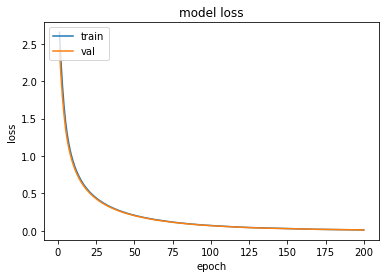

In [28]:
# 그래프 출력해보자
import matplotlib.pyplot as plt
epochs = range(1, len(his.history['accuracy'])+1)

plt.plot(epochs, his.history['loss'])
plt.plot(epochs, his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [35]:
print("\n 테스트 정확도: ",round(model.evaluate(X_test, Y_test)[1],4))

1/1 [==============================] - 0s 22ms/step - loss: 0.0879 - accuracy: 0.9524

 테스트 정확도:  0.9524
